<a href="https://colab.research.google.com/github/anish3565/QML/blob/main/Quantum_SVM/PD_FeatureMap_SVCs_3_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1yWXf9JyReDjTxIvH0FxiZtcJsAF5vUn5#scrollTo=RZE5ajxtjO9a

In [ ]:
%pip install qiskit_machine_learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.8 MB/s eta 0:00:00


In [ ]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector


# using a real dataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
import pandas as pd
import seaborn as sns
import time

In [ ]:
url="https://raw.githubusercontent.com/SayamAlt/Parkinson-s-Disease-Detection/refs/heads/main/parkinsons.csv"
df=pd.read_csv(url)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
features=MinMaxScaler().fit_transform(df.drop(['name'],axis=1))

In [ ]:
print(features)

[[0.18430827 0.11259173 0.05481479 ... 0.58576513 0.39066128 0.4973096 ]
 [0.19832685 0.09493044 0.2783228  ... 0.74133704 0.47314522 0.67132602]
 [0.16503854 0.05912816 0.26528838 ... 0.68637091 0.40881938 0.59668246]
 ...
 [0.50273036 0.28141298 0.05072714 ... 0.34257652 0.55896743 0.18057983]
 [0.6428929  0.60180655 0.05427936 ... 0.45288473 0.31822198 0.16313677]
 [0.73327434 0.32279413 0.07194837 ... 0.41509481 0.50367281 0.21545975]]


In [ ]:
def enhanced_feature_map(data_point, data_point2):
  n_qubits = num_attributes = len(data_point)
  qr = QuantumRegister(n_qubits)
  cr = ClassicalRegister(n_qubits)
  qc = QuantumCircuit(qr, cr)

  #constructing U(x)
  for i in range(n_qubits):
    qc.h(qr[i])
    qc.rz(2 * data_point[i], qr[i])
    qc.ry(2 * data_point[i], qr[i])

  qc.barrier()

  for i in range(n_qubits - 1):
    qc.cx(qr[i], qr[i + 1])

  qc.barrier()

  for i in range(n_qubits):
    qc.rz(2 * data_point[i], qr[i])

  qc.barrier()

  #constructing U-dagger(X-prime)
  for i in range(n_qubits):
    qc.rz(-2 * data_point2[i], qr[i])

  qc.barrier()

  for i in range(n_qubits - 1):
    qc.cx(qr[n_qubits - 2 - i], qr[n_qubits - 1 - i])

  qc.barrier()
  for i in range(n_qubits):
    qc.ry(-2 * data_point2[i], qr[i])
    qc.rz(-2 * data_point2[i], qr[i])
    qc.h(qr[i])
    qc.measure(qr[i], cr[i])

  qc.barrier()

  return qc

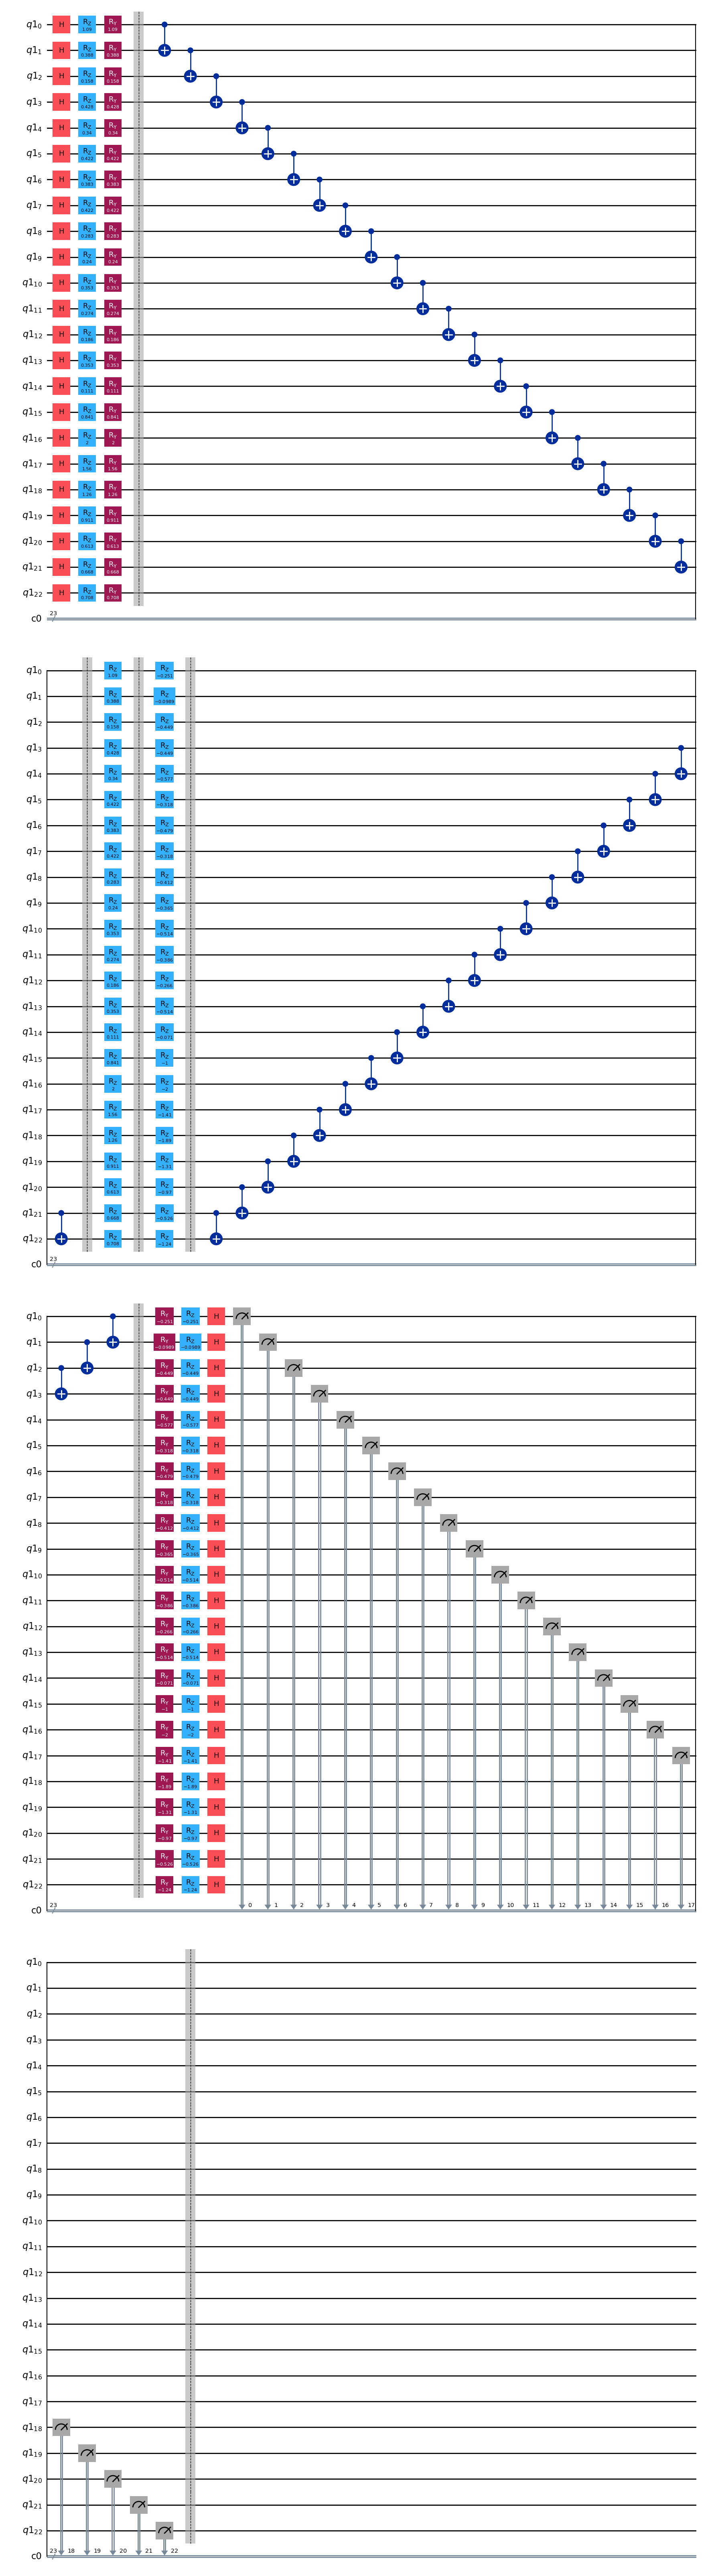

In [ ]:
data_point = features[123]
data_point2 = features[55]
qc = enhanced_feature_map(data_point, data_point2)
qc.draw('mpl')

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc)
job.result().get_counts()

{'11011110111101110101111': 1,
 '10111111111110111000000': 1,
 '00101111101110111111110': 1,
 '10000000000000000000111': 1,
 '00001111111011110111110': 1,
 '10110000000000000000001': 2,
 '01011101111101111111110': 1,
 '00000001111101100100000': 1,
 '00001111111111111011111': 1,
 '00001100111111111111110': 1,
 '01111111111111111111001': 1,
 '00111111110111111001110': 1,
 '01111101111011111011110': 1,
 '00000100000000000000100': 1,
 '10010000000000000000001': 1,
 '10111110111111111111111': 1,
 '00001111111100111111110': 1,
 '01101101111111111111110': 1,
 '10000111111111110000100': 1,
 '00111111111111110110110': 1,
 '00001110111111110010110': 1,
 '00001110011111110101110': 1,
 '11111110111100000000001': 1,
 '10111110111111110111011': 1,
 '00001111101111111111110': 2,
 '01000000000000000000001': 4,
 '11011111111111001111111': 1,
 '00111111111111011111001': 1,
 '10000000000000001000001': 1,
 '00110000000000000000001': 2,
 '00000000010000000000001': 3,
 '00111111111110111111110': 1,
 '000011

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
df['status']

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [ ]:
condition = []

for i in range(len(df['status'])):
    if df['status'][i] == 0:
        condition.append("healthy")
    else:
        condition.append('parkinson')

df['condition'] = condition
print(df)

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

In [ ]:
def feature_map(data_point):
  # encode a NEW circuit for a given datapoint.
  n_qubits = len(data_point)
  qr = QuantumRegister(n_qubits)
  cr = ClassicalRegister(n_qubits)
  qc = QuantumCircuit(qr, cr)

  for i in range(n_qubits):
    qc.h(qr[i])

  qc.barrier()

  for i in range(n_qubits):
    # set the rotation angle based on this current data.
    constant = 2 * data_point[i]
    qc.rx(constant * np.pi, qr[i])

  qc.barrier()

  for i in range(n_qubits - 1):
    qc.cx(qr[i], qr[i + 1])

  qc.draw('mpl')

  return qc

In [ ]:
def test_set(curr_set, data_point):
  pr = []
  for i, r in curr_set.iterrows():
    backend = Aer.get_backend('statevector_simulator')
    qc = enhanced_feature_map(data_point, features[i])
    job = backend.run(qc)
    result = job.result()
    statevector = result.get_statevector()
    pr.append(np.abs(statevector[0])**2)

  # return mean of pr
  return np.mean(pr)

In [ ]:
def get_accuracies(predicted_labels, actual_labels):
    # Define the correct ranges
    parkinson_correct = set(actual_labels[actual_labels == 1].index)  # Correct indices for Parkinson's (status = 1)
    healthy_correct = set(actual_labels[actual_labels == 0].index)  # Correct indices for Healthy (status = 0)

    # Convert predictions to sets
    parkinson_actual = set(predicted_labels[predicted_labels == 1].index)
    healthy_actual = set(predicted_labels[predicted_labels == 0].index)

    # Count missing points (misclassified cases)
    parkinson_missing = len(parkinson_correct - parkinson_actual)
    healthy_missing = len(healthy_correct - healthy_actual)

    # Total classification errors
    total_errors = parkinson_missing + healthy_missing

    # Compute final accuracy
    total_samples = len(actual_labels)
    final_correct = (total_samples - total_errors) / total_samples * 100

    # Print results
    print(f"Total classification errors: {total_errors}")
    print(f"Classification Accuracy: {final_correct:.2f}%")

    return final_correct

In [ ]:
features

array([[0.18430827, 0.11259173, 0.05481479, ..., 0.58576513, 0.39066128,
        0.4973096 ],
       [0.19832685, 0.09493044, 0.2783228 , ..., 0.74133704, 0.47314522,
        0.67132602],
       [0.16503854, 0.05912816, 0.26528838, ..., 0.68637091, 0.40881938,
        0.59668246],
       ...,
       [0.50273036, 0.28141298, 0.05072714, ..., 0.34257652, 0.55896743,
        0.18057983],
       [0.6428929 , 0.60180655, 0.05427936, ..., 0.45288473, 0.31822198,
        0.16313677],
       [0.73327434, 0.32279413, 0.07194837, ..., 0.41509481, 0.50367281,
        0.21545975]])

In [ ]:
def custom_tester():
    trained_parkinson = []
    trained_healthy = []

    # Split the dataset
    parkinson_set = features[condition == 1][:20]  # First 20 Parkinson's samples
    healthy_set = features[condition == 0][:20]  # First 20 Healthy samples

    test_len = 30  # Number of test points

    for i in range(test_len):
        data_point = features.iloc[i + 20]  # Select next data point
        pr_parkinson = test_set(parkinson_set, data_point)
        pr_healthy = test_set(healthy_set, data_point)

        print(f"Probabilities for test point {i + 20}: Parkinson {pr_parkinson}, Healthy {pr_healthy}")

        # Classify based on the highest probability
        if pr_parkinson > pr_healthy:
            trained_parkinson.append(i + 20)
        else:
            trained_healthy.append(i + 20)

    print(f"Trained Parkinson cases: {trained_parkinson}")
    print(f"Trained Healthy cases: {trained_healthy}")

    get_accuracies(trained_parkinson, trained_healthy)

In [ ]:
# custom_tester

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load Parkinson’s dataset (assuming a DataFrame with 'status' column)
df = pd.read_csv(url)  # Replace with actual file
X = df.drop(columns=['name','status'])  # Features
y = df['status']  # Target labels (1 = Parkinson’s, 0 = Healthy)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Train different SVM kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Get accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}%")


Kernel: linear, Accuracy: 85.26%
Kernel: poly, Accuracy: 75.00%
Kernel: rbf, Accuracy: 75.00%
